# Exam #2 Retake - FDS FALL 19' - EDA, Statistics and Preprocessing

For this part, you will work with a census data set. Please find the data file and the data dictionary attached.

<div class="alert alert-warning">
<b>Important:</b> Make sure you follow what we learned regarding what should be done on the train set and what should be done on the test set
</div>

<div class="alert alert-info">
<b>Note:</b> You should submit the answers to this question in a report format - everything you do should be documented, you should track the changes to the shape of your dataset, explain the business thought behind your decisions and make everything super clear
</div>

<div class="alert alert-warning">
<b>Important:</b> Do not perform actions that are not neccessary. Make sure there is a thought behind each step you take
</div>

**Here are some packages you will need:**

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from bubble_plot.utils import describe_categorical_values
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

**Here are some helper functions for your use:**

In [147]:
def get_redundant_binary_cols(data, threshold):
    '''
    This function gets a pandas DataFrame, and a threshold (% of data), 
    and returns the list of binary features from that dataframe that have 
    above threshold amount of samples with the same value, and thus
    should be considered redundant. 
    '''
    
    bool_cols = [col for col in data \
             if pd.Series(data[col].unique()).isin([0, 1]).all()]
    return [x for x in bool_cols if data[x].value_counts()[0] \
                                                > threshold * len(X_train)] + \
                    [x for x in bool_cols if data[x].value_counts()[1] \
                                                > threshold * len(X_train)]

`pd.to_datetime(df.Date)`: will transfer a string column to a date type

**Questions:**

#### 1. Read the data file and present summary statistics, datatype per column and NA status for each column. 



In [148]:
df = pd.read_csv('adult_data_1.csv')
df

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Summary statistics

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education-num   32561 non-null  int64 
 6   marital-status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital-gain    32561 non-null  int64 
 12  capital-loss    32561 non-null  int64 
 13  hours-per-week  32561 non-null  int64 
 14  native-country  32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


As we can see no nulls/missing values:

In [150]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

Now check for duplicates:

In [151]:
df[df.duplicated()]

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


Great - no any duplicates

Let's split columns on continuous and categorical

In [152]:
numerical_columns = df.describe().columns

categorical_columns = df.dtypes[df.dtypes == object].index.tolist()

print('continious features: {}'.format(numerical_columns))
print('\ncategorical features: {}'.format(categorical_columns))

continious features: Index(['Unnamed: 0', 'age', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')

categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


Here some statistics for categorical features

In [153]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


We have 16 features at all and here what about numerical features:

In [154]:
print('There are {} numerical features'.format(len(numerical_columns)))
discrete = []
for var in numerical_columns:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
print('And {} of them (numerical variables) -  discrete variable'.format(len(discrete)))

There are 7 numerical features
education-num  values:  [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
And 1 of them (numerical variables) -  discrete variable


Now let's look at the numerical features statistics

In [155]:
df.describe()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16280.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8140.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16280.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24420.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32560.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### 1.b. Perform data integrity checks if needed (Don't do more than two columns)

We will start from categorical features

In [156]:
describe_categorical_values(df, non_interesting_columns=df.describe(), num_categories=8)

,0,1,2,3,4,5,6,7
workclass,Private: 70%,Self-emp-not-inc: 8%,Local-gov: 6%,?: 6%,State-gov: 4%,Self-emp-inc: 3%,Federal-gov: 3%,Without-pay: 0%
education,HS-grad: 32%,Some-college: 22%,Bachelors: 16%,Masters: 5%,Assoc-voc: 4%,11th: 4%,Assoc-acdm: 3%,10th: 3%
marital-status,Married-civ-spouse: 46%,Never-married: 33%,Divorced: 14%,Separated: 3%,Widowed: 3%,Married-spouse-absent: 1%,Married-AF-spouse: 0%,None
occupation,Prof-specialty: 13%,Craft-repair: 13%,Exec-managerial: 12%,Adm-clerical: 12%,Sales: 11%,Other-service: 10%,Machine-op-inspct: 6%,?: 6%
relationship,Husband: 41%,Not-in-family: 26%,Own-child: 16%,Unmarried: 11%,Wife: 5%,Other-relative: 3%,None,None
race,White: 85%,Black: 10%,Asian-Pac-Islander: 3%,Amer-Indian-Eskimo: 1%,Other: 1%,None,None,None
sex,Male: 67%,Female: 33%,None,None,None,None,None,None
native-country,United-States: 90%,Mexico: 2%,?: 2%,Philippines: 1%,Germany: 0%,Canada: 0%,Puerto-Rico: 0%,El-Salvador: 0%
income,<=50K: 76%,>50K: 24%,None,None,None,None,None,None


We have we weird values in 3 columns

In [157]:
print('In this columns there are some ` ?` characktel instead value:\n')
for col in df.columns:
    if ' ?' in df[col].unique():
        print(col)

In this columns there are some ` ?` characktel instead value:

workclass
occupation
native-country


/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


At first we have to chack these values

In [158]:
def get_redundant_binary_cols(data, threshold):
    '''
    This function gets a pandas DataFrame, and a threshold (% of data), 
    and returns the list of binary features from that dataframe that have 
    above threshold amount of samples with the same value, and thus
    should be considered redundant. 
    '''
    
    bool_cols = [col for col in data \
             if pd.Series(data[col].unique()).isin([0, 1]).all()]
    return [x for x in bool_cols if data[x].value_counts()[0] \
                                                > threshold * len(X_train)] + \
                    [x for x in bool_cols if data[x].value_counts()[1] \
                                                > threshold * len(X_train)]

get_redundant_binary_cols(df,'workclass')

[]

In [159]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

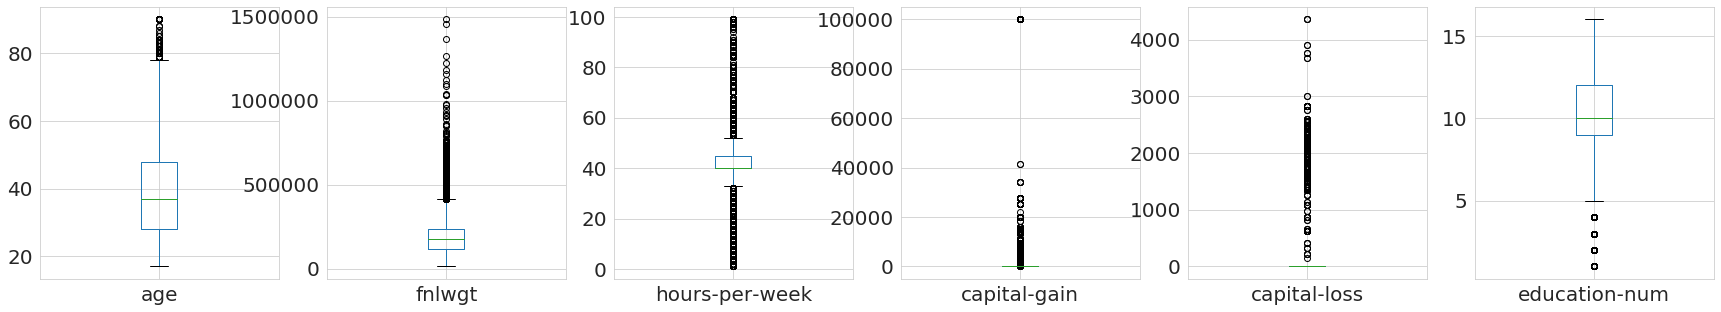

In [160]:
plt.figure(figsize=(30,5))
for i,col in enumerate(continuous1):
    plt.subplot(1,len(continuous1),i+1)
    df[[col]].boxplot(fontsize=20)


Maybe on the plot it will be better

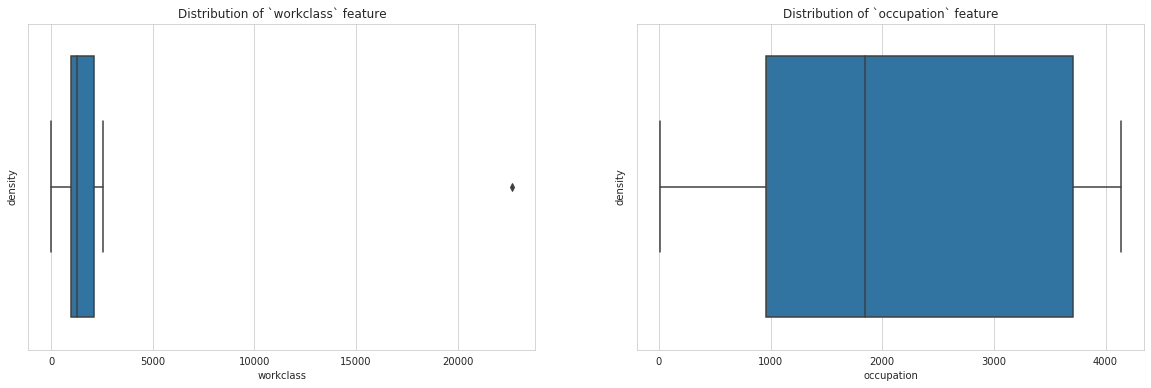

In [161]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title("Distribution of `workclass` feature")
sns.boxplot(df.workclass.value_counts(), ax=ax1)
ax1.set(ylabel='density')

ax2.set_title("Distribution of `occupation` feature")
sns.boxplot(df.occupation.value_counts(), ax=ax2)
ax2.set(ylabel='density')

plt.show()

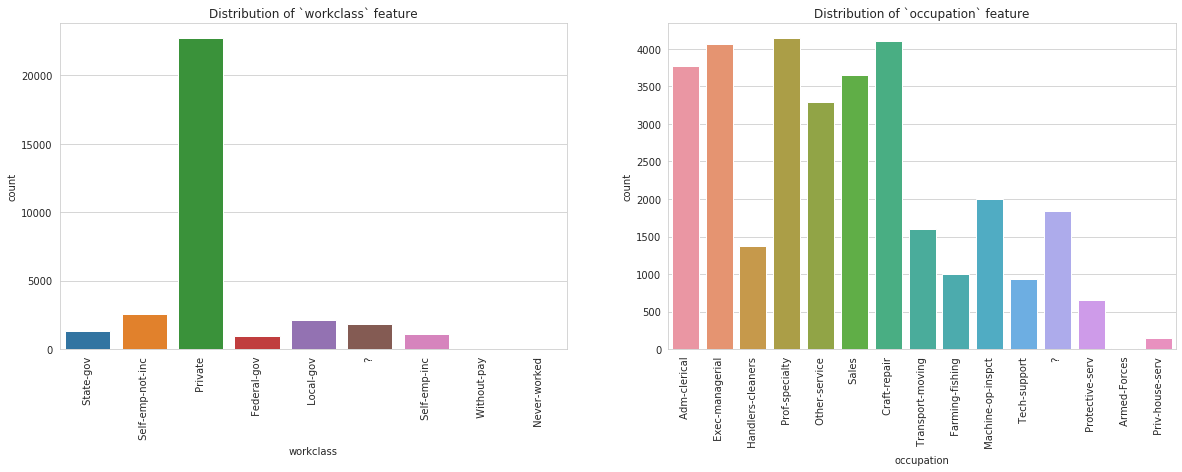

In [162]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

ax1.set_title("Distribution of `workclass` feature")
sns.countplot(df.workclass, ax=ax1)

ax2.set_title("Distribution of `occupation` feature")
sns.countplot(df.occupation, ax=ax2)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
plt.show()

We almost have no outliers here(not much)

Seems this categore `?` means some  `other`

Let's Impute missing values for categorical columns with the most common values

In [163]:
categorical_columns = [x for x in df.columns if x not in numerical_columns and x!='income']
for col in categorical_columns:
    df.loc[df[col]==' ?',col] = df[col].value_counts().index.values[0]
    

Let's Remove infrequent categorical values

In [164]:
from bubble_plot.utils import remove_infrequent_values

df = remove_infrequent_values(df, categorical_columns)

removing columns: 
 Without-pay     14
 Never-worked     7
Name: workclass, dtype: int64 

removing columns: 
 Armed-Forces    9
Name: occupation, dtype: int64 

removing columns: 
 Cambodia                      19
 Trinadad&Tobago               19
 Thailand                      18
 Laos                          18
 Yugoslavia                    16
 Outlying-US(Guam-USVI-etc)    14
 Honduras                      13
 Hungary                       13
 Scotland                      12
 Holand-Netherlands             1
Name: native-country, dtype: int64 



Also we have a `unknown` column

In [57]:
df['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
32556    32556
32557    32557
32558    32558
32559    32559
32560    32560
Name: Unnamed: 0, Length: 32561, dtype: int64

We will drop it 

In [144]:
df.drop('Unnamed: 0',axis=1, inplace=True)

#### 2. We are trying to Predict whether income exceeds $50K/yr, per row in the data (person). According to this research question, define the dependent variable, as well as all the categorical (nominal / ordinal) and continuous features, in a markdown cell

1. continious features:`age`, `fnlwgt`, `education-num`, `capital gain`,`capital-loss`,`hours-per-week`

2. categorical features `workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`,`income`

3. our target/dependent variable feature is `income`



In [145]:
df['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [59]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

#### 3. Plot the distribution (density plot / histogram) per feature. Make sure you use the correct plot per type of feature, and that you do not plot categorical features with unique values only.

Let's make boxplots to visualise outliers in the continuous variables


In [67]:
continuous1 = [   'age',
                 'fnlwgt',
                 'hours-per-week','capital-gain','capital-loss', 'education-num']
continuous2 = ['age',
                 'fnlwgt',
                 'hours-per-week']

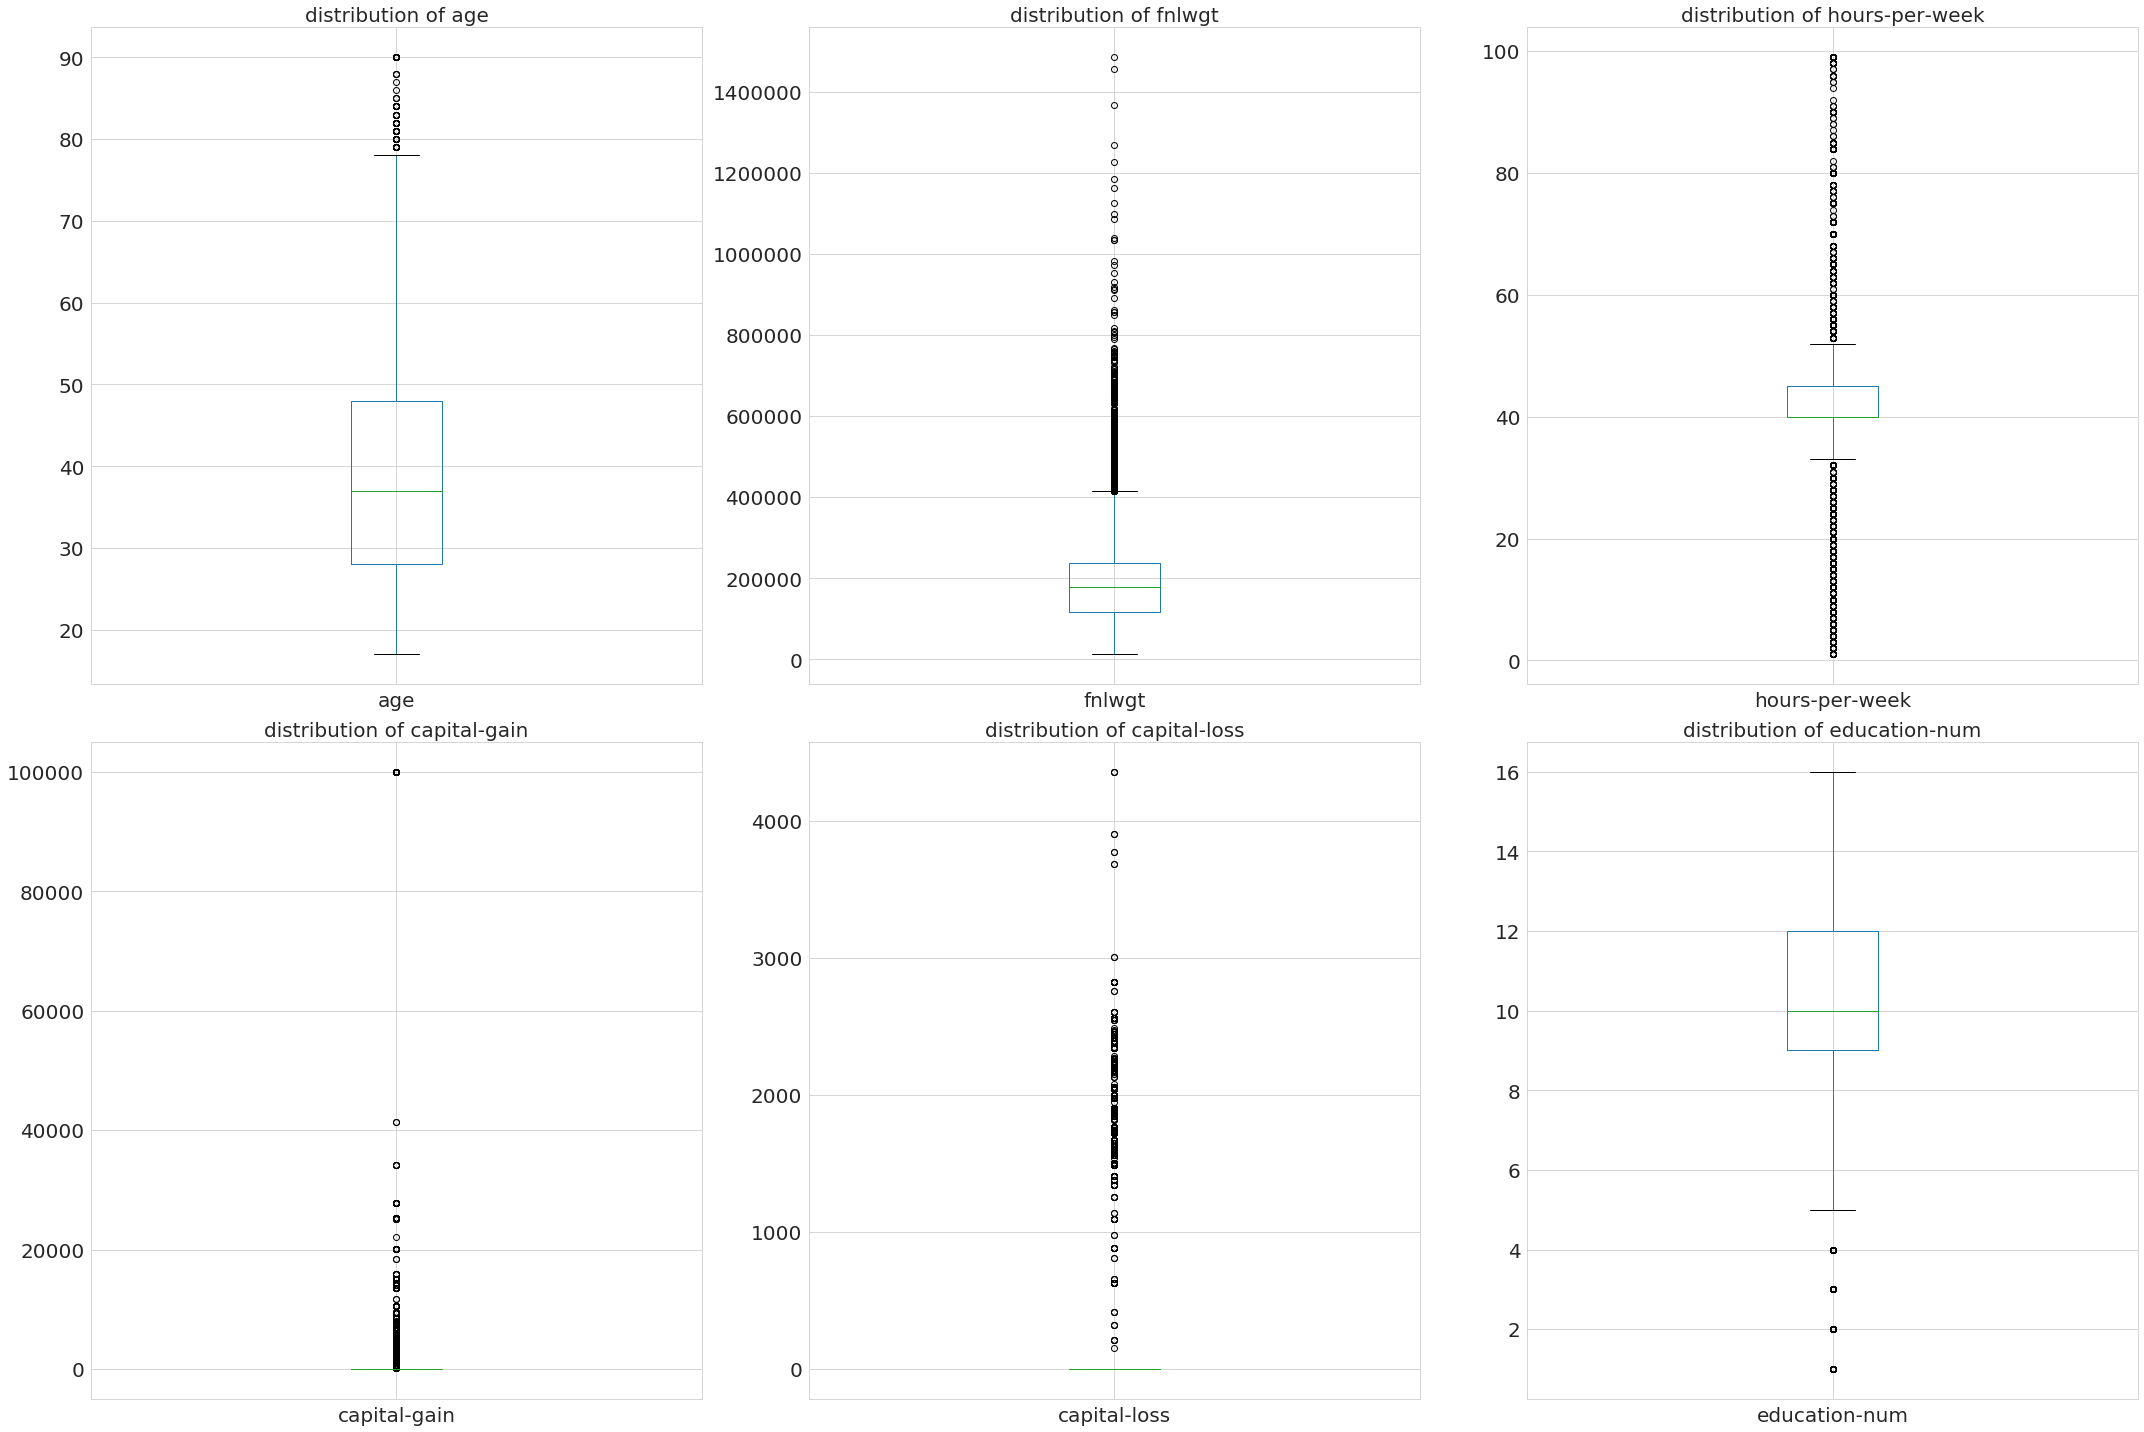

In [90]:
plt.figure(figsize=(30,20))
for i,col in enumerate(continuous1):
    plt.subplot(2,len(continuous1)/2,i+1)
    plt.tight_layout()
    plt.title('distribution of {}'.format(col), fontsize=20)
    df[[col]].boxplot(fontsize=20)


Numerical features with dependent feature:

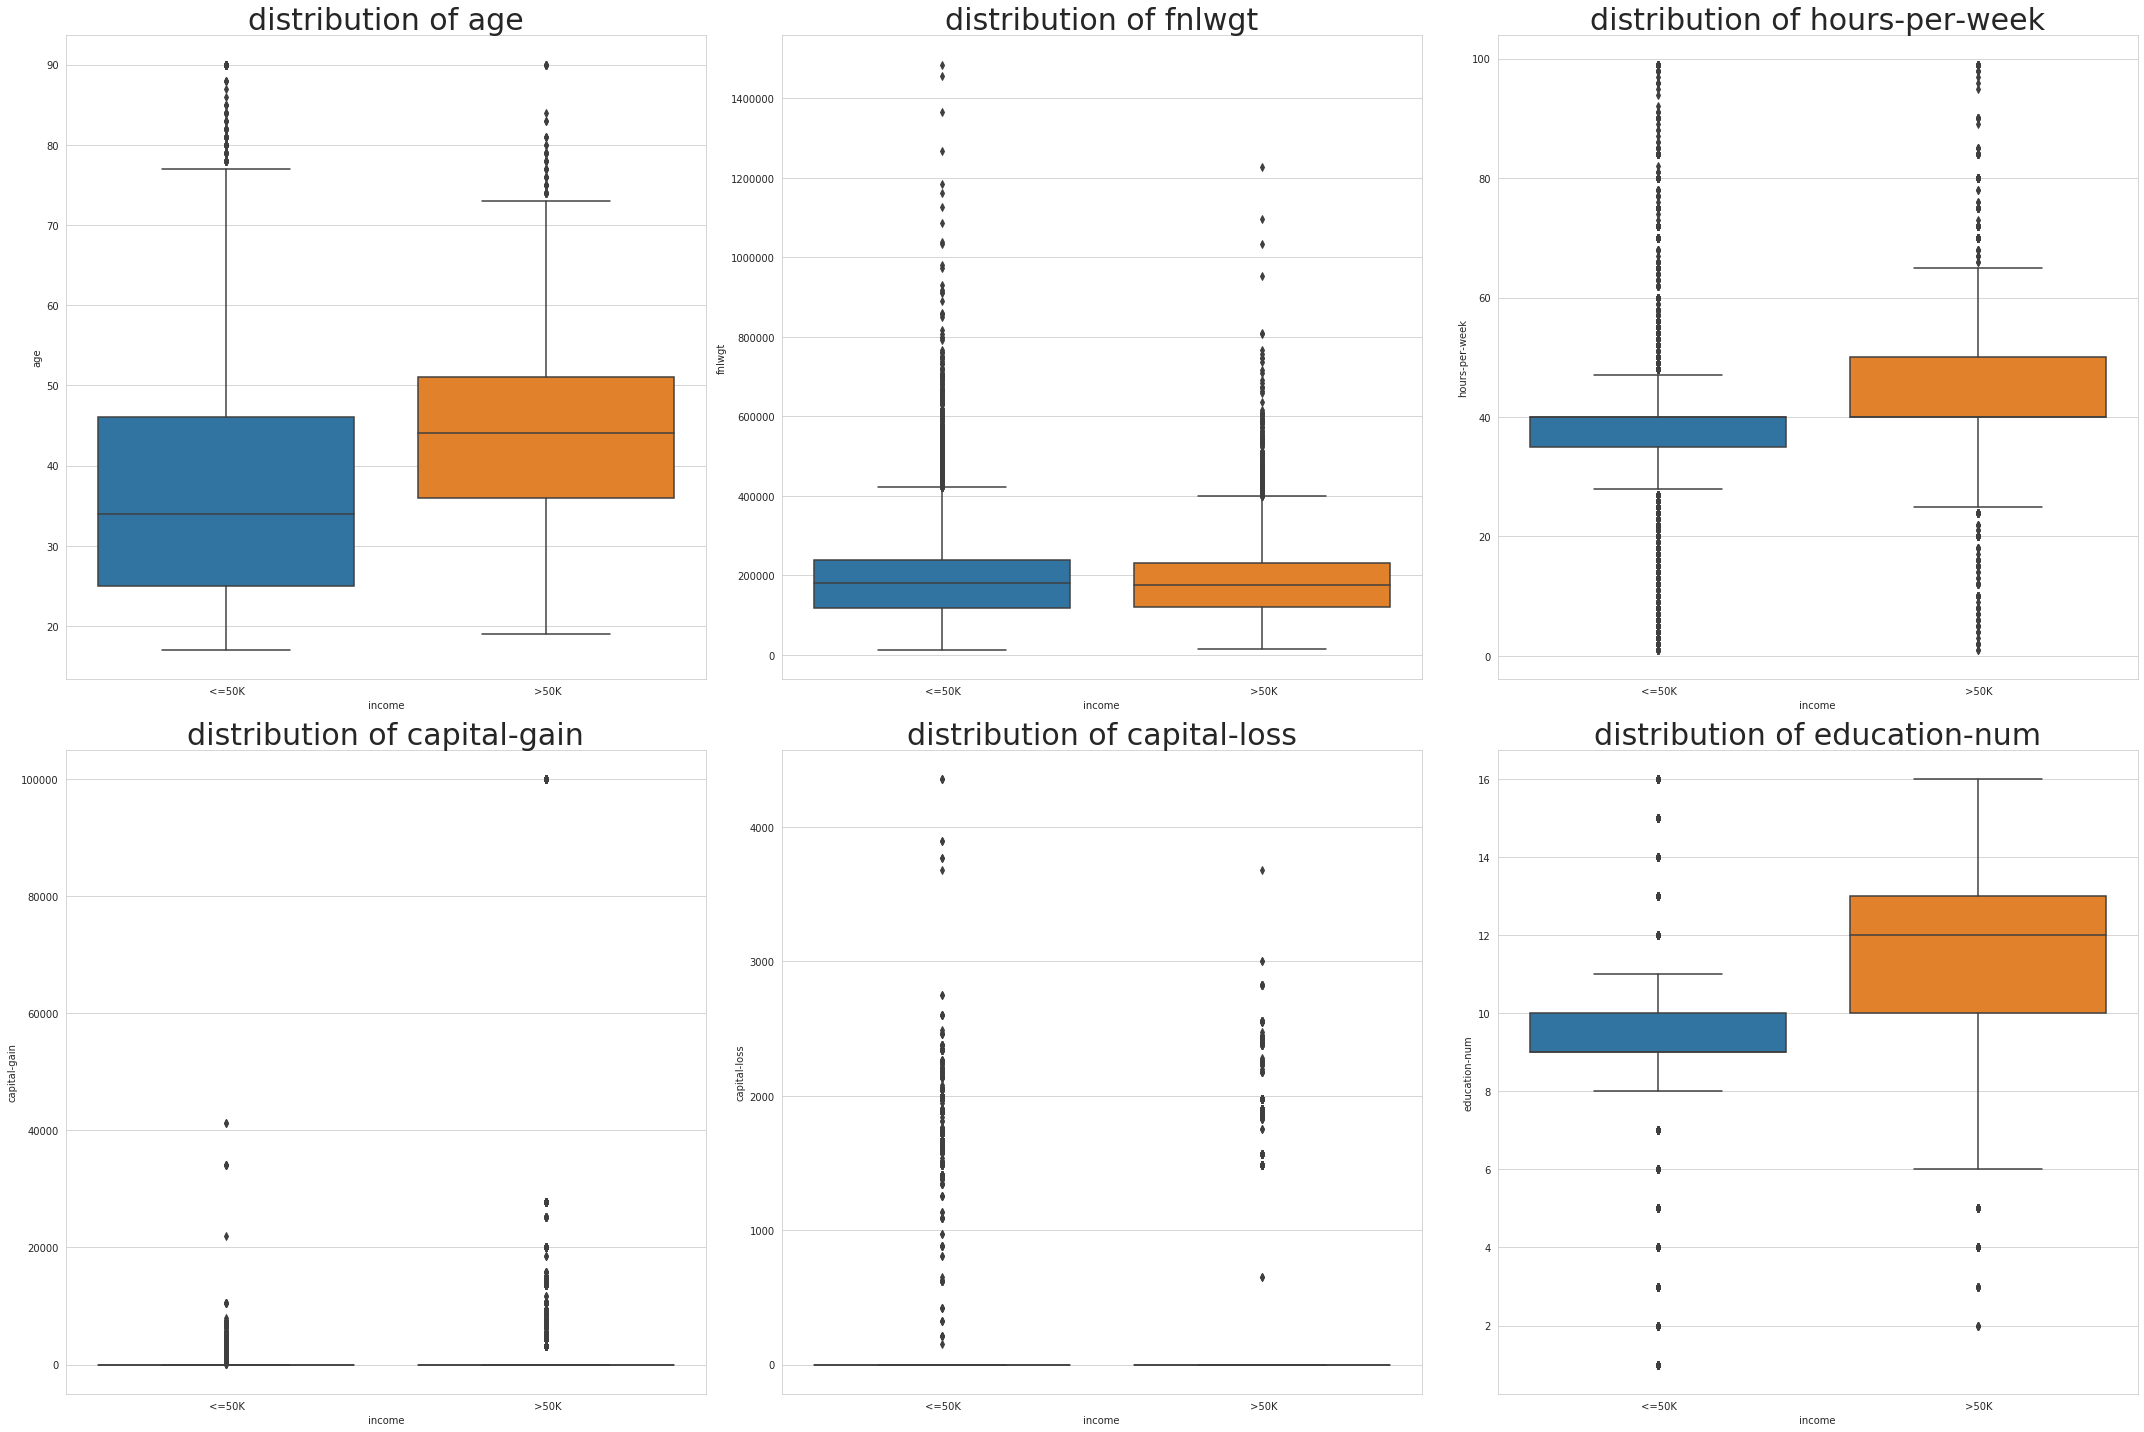

In [94]:
plt.figure(figsize=(30,20))
for i,col in enumerate(continuous1):
    plt.subplot(2,len(continuous1)/2,i+1)
    plt.tight_layout()
    plt.title('distribution of {}'.format(col), fontsize=30)
    sns.boxplot(df['income'],df[col])

And KDE plot + boxplot for some numeric 
features

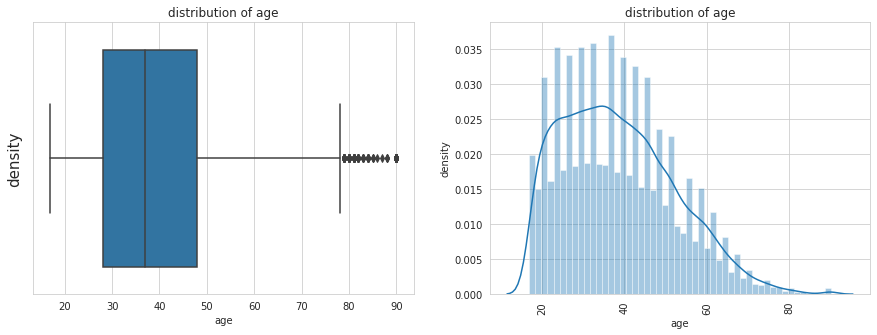

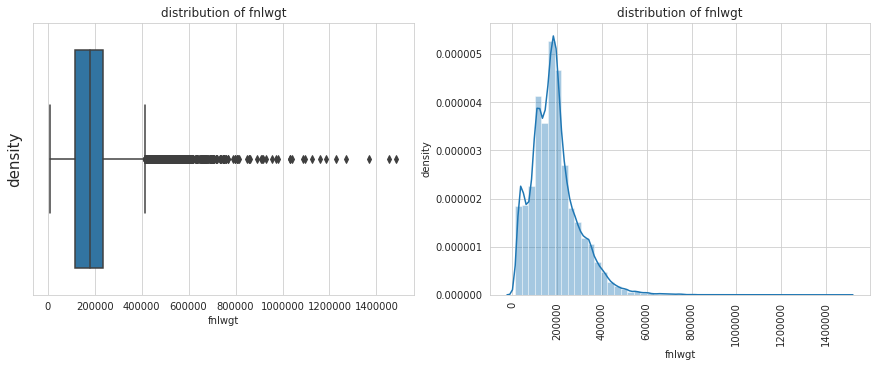

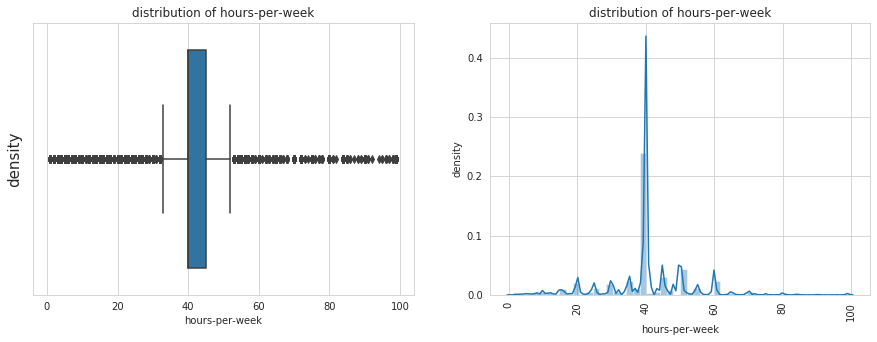

In [121]:
for var in continuous2:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
   
    sns.set_style('whitegrid')
    fig = sns.boxplot(df[var])
    fig.set_title('distribution of {}'.format(var))
    fig.set_ylabel('density',fontsize=15)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var])
    fig.set_title('distribution of {}'.format(var))
    fig.set_ylabel('density')
    fig.set_xlabel(var)
    plt.xticks(rotation=90)

    plt.show()
    

In [ ]:
categorical_columns = ['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex', 
 'income']

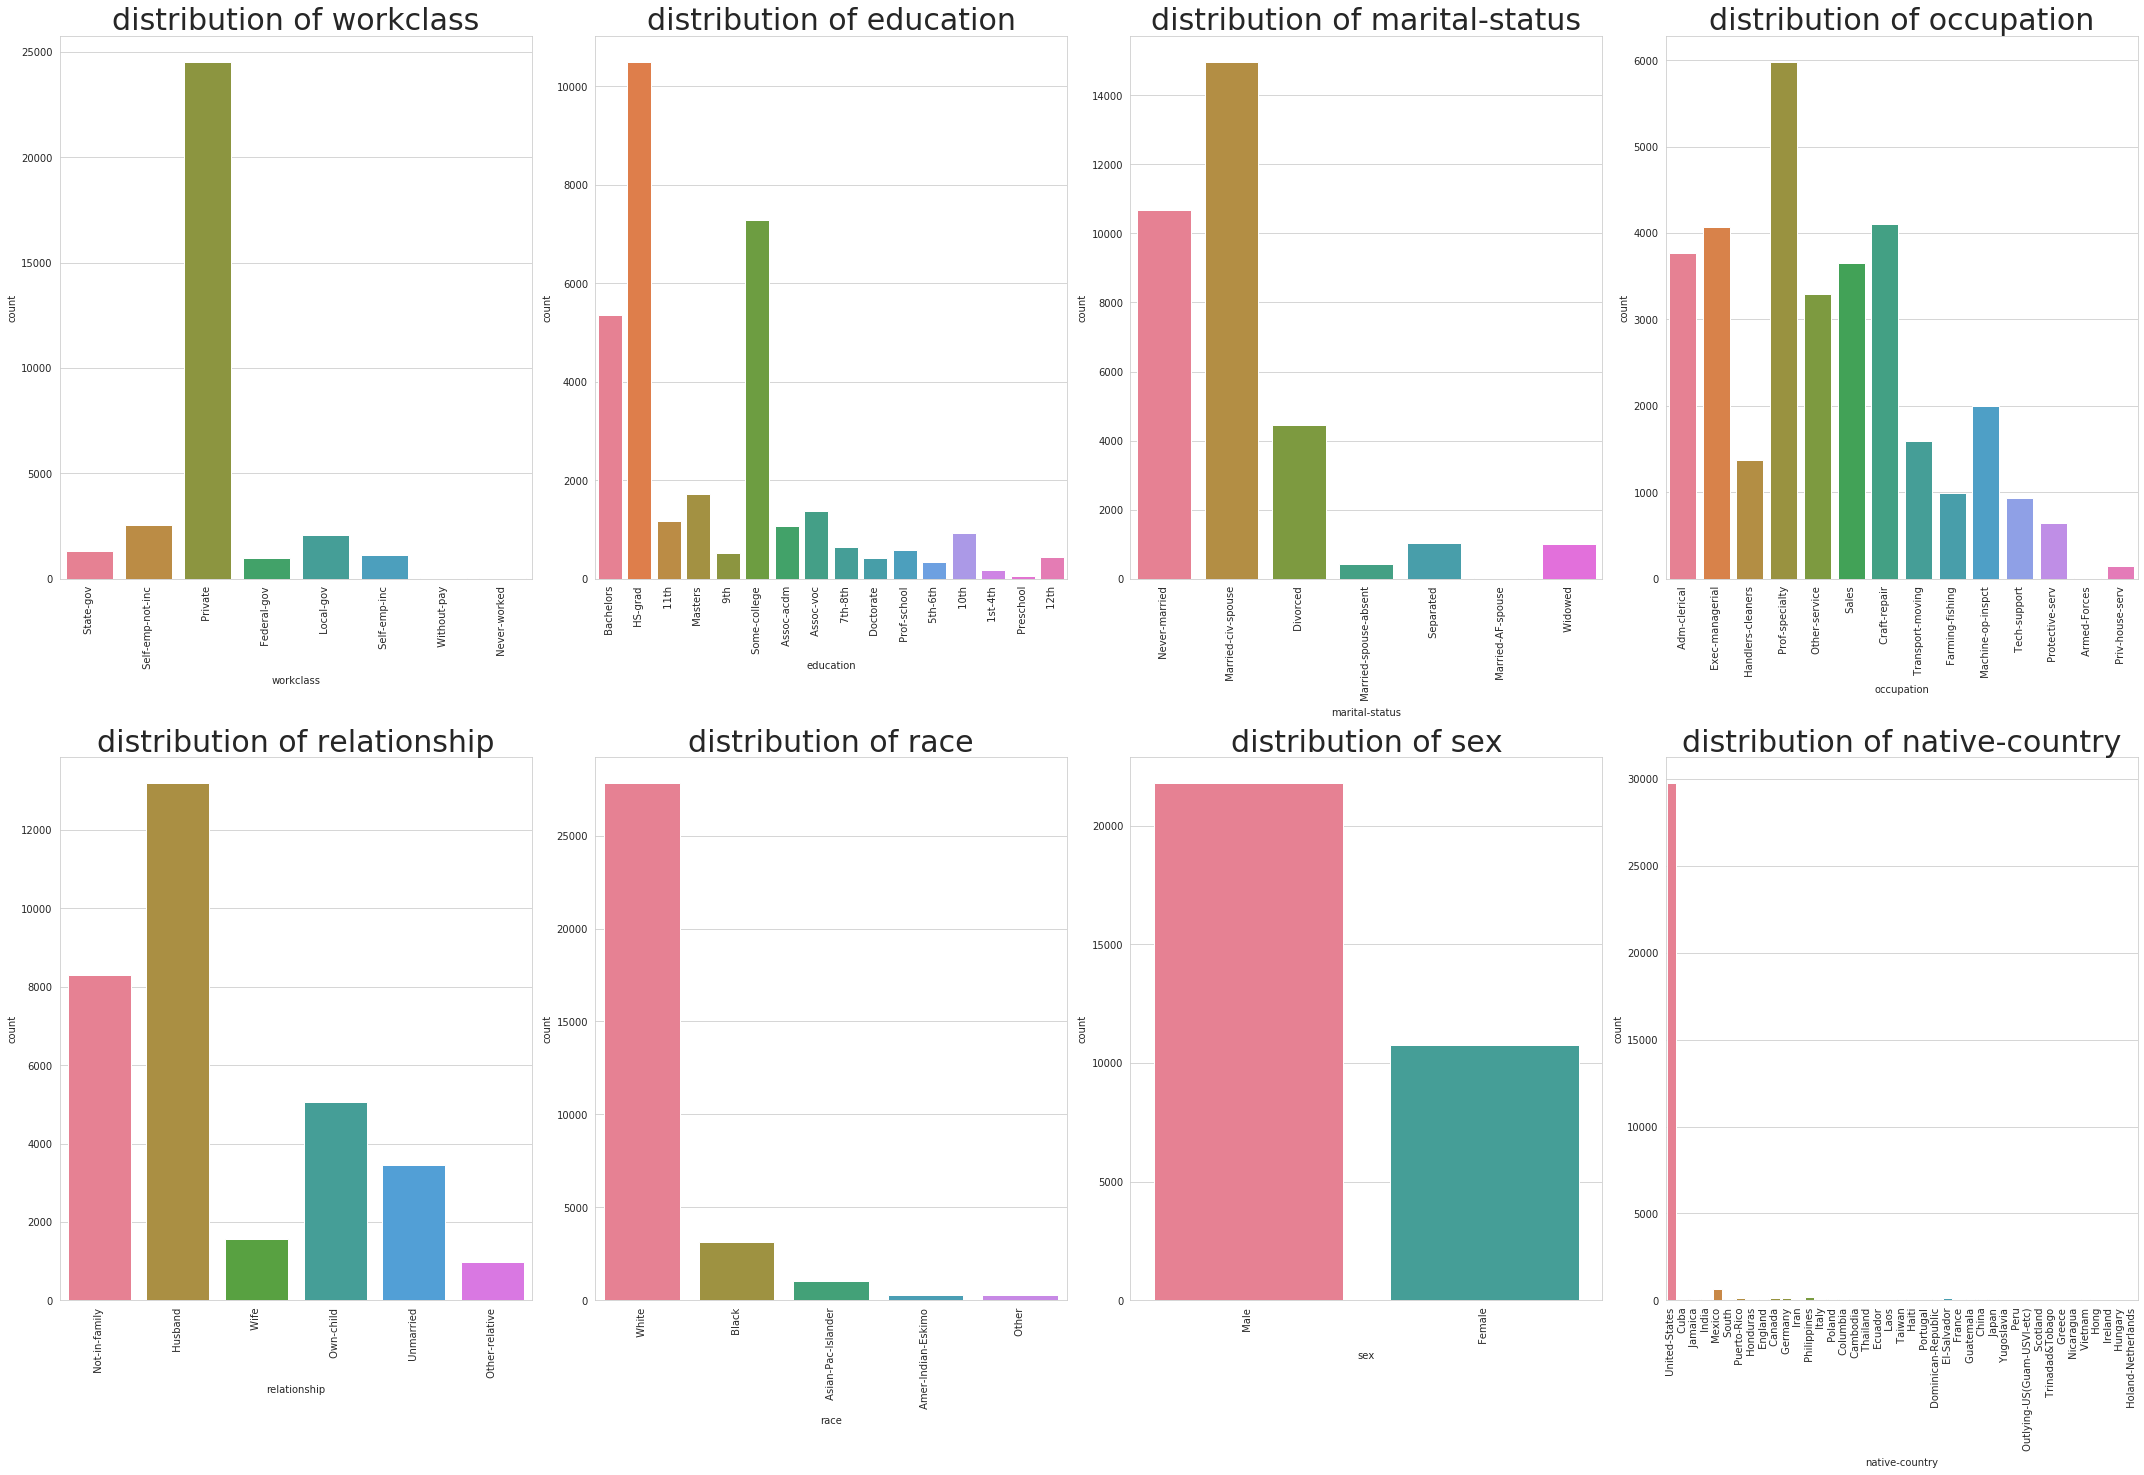

In [112]:
plt.figure(figsize=(30,20))
for i,col in enumerate(categorical_columns):
    plt.subplot(2,4,i+1)
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.title('distribution of {}'.format(col), fontsize=30)
    sns.countplot(x=col, palette="husl", data=df)
#to zoom the plot = double click on the plot

Well, again the distribution of `native-countrie` shows us, that the main population is from USA and Mexico

Let's check, maybe we can split that column on 3 categories later on

4. Split the data to a train set and a test set according to a method of your choice, and specify your business logic behind this choice 

I'll split the data set into 2 sets with keeping the proportion of target/dependent feature - it will be exactly according the business logic

In [37]:
target = 'income'
features = df.drop(columns=[target], axis=1).columns.tolist()
rel_df = df[features + [target]].drop_duplicates()

In [47]:
X = rel_df[features]
y = rel_df[target]

In [48]:
skf = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
train_index, test_index = list(skf.split(X, y))[0]
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]
print('Splited  dataset into a 2 sets by dependent variable :',
      '\nTrain set is:', round(len(X_train)/len(df)*100,1), '%'\
      '\nTest set is:', round(len(X_test)/len(df)*100, 1), '%')

Splited  dataset into a 2 sets by dependent variable : 
Train set is: 80.0 %
Test set is: 20.0 %


In [50]:
df.income.value_counts()/len(df)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [51]:
pd.Series(y_train).value_counts()/len(y_train)

 <=50K    0.759214
 >50K     0.240786
Name: income, dtype: float64

In [52]:
pd.Series(y_test).value_counts()/len(y_test)

 <=50K    0.759097
 >50K     0.240903
Name: income, dtype: float64

## **Take the next steps on <span style="color:red">both datasets</span>, according to the restrictions you learned.**

5. Take care of NA values and outliers (if any). Specify the business logic behind your choice.

In [24]:
# your code here

6. Plot the distribution of 3 variables of your choice against the dependent variable - summarize interesting findings if any. One of the chosen features must be numeric, and another one must be categorical. You can choose the third one as you wish.

In [25]:
# your code here

7. Plot the distribution of 3 independent variables against eachother (3 plots overall), including a color bar for the dependent variable - summarize interesting findings if any. One of the chosen features must be numeric, and another one must be categorical. You can choose the third one as you wish.

In [26]:
# your code here

9. Generate a correlation matrix and plot a heat map of it. What can you say about the correlations?

In [27]:
# your code here

11. Deal with 3 of the categorical features (prepare them for a model)

In [28]:
# your code here

12. Deal with numerical features

In [29]:
# your code here

13. Select features according to the correlations and other criteria (cardinality, value distribution, % of similar values in the column, drop ids, etc...) - see helper function. By selecting features we mean - drop any unwanted features. **Make sure you are left only with features that we can you in a model**

In [30]:
# your code here